In [2]:
%load_ext autoreload
%autoreload 2
from wd_setup import WhiteDwarf
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

<Axes: title={'center': 'Total Mass: 0.200$M_{\\odot}$'}, xlabel='Radius (km)', ylabel='Mass ($M_\\odot$)'>

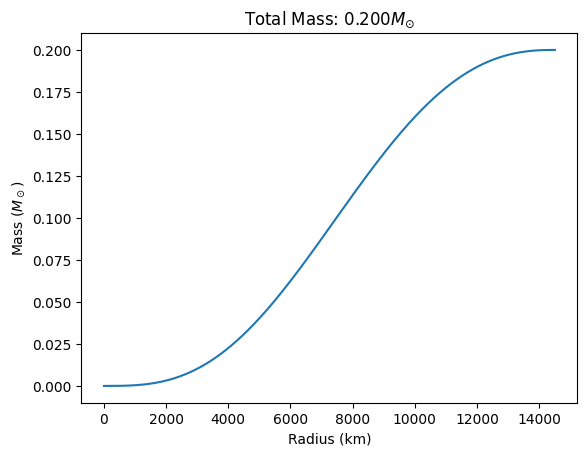

In [3]:
wd_k0 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e-1, Z=6, k=0)
wd_k0.integrate()
wd_k0.plot_profile("M")

1.214e+24


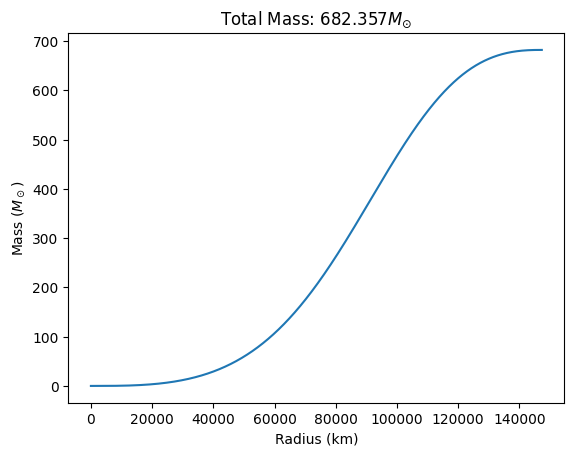

In [261]:
from constants import proton_energy
wd = WhiteDwarf(Ye=0.5, rhoc_scaled=1e-1, Z=6, k=1e-33)
wd.integrate()
wd.plot_profile('M')
print(f"{wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0):.3e}")

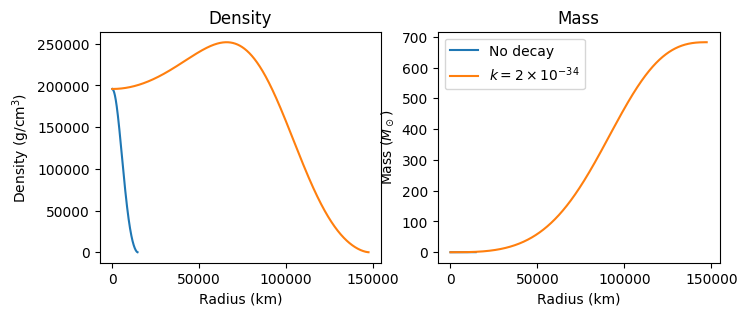

In [238]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
wd_k0.plot_profile('rho', ax=ax[0], label='No decay')
wd.plot_profile('rho', ax=ax[0], label=r'$k=2\times10^{-34}$', title='Density')
wd_k0.plot_profile('M', ax=ax[1], label='No decay')
wd.plot_profile('M', ax=ax[1], label=r'$k=2\times10^{-34}$', title='Mass')
plt.legend()

In [15]:
def get_MR(k):
    R = []
    M = []
    L = []
    rho_range = np.logspace(-1, 6, 10)
    for rho in tqdm(rho_range):
        wd = WhiteDwarf(Ye=0.5, rhoc_scaled=rho, Z=6, k=k)
        wd.integrate()
        R.append(wd.rbar2r(wd.radius))
        M.append(wd.mbar2m(wd.mass))
        L.append(wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0))

    return np.array(R), np.array(M), np.array(L)

In [86]:
MR_r, MR_m, MR_L = [] , [], []
k_list = np.linspace(1e-34, 1e-33, 10)
for k in k_list:
    r, m, L = get_MR(k)
    MR_r.append(r)
    MR_m.append(m)
    MR_L.append(L)

100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


In [87]:
df = pd.read_csv("/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/data/MWDD-export.csv")
df = df.dropna(subset=df.columns)
df.head
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km
radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [88]:
df.head

<bound method NDFrame.head of                          wdid       icrsra       icrsdec     teff   logg  \
0                 * alf CMa B  06 45 08.79  -16 43 15.36  26083.0  8.610   
1                 * alf CMi B  07 39 17.88   05 13 26.76   7585.0  7.964   
2               * omi02 Eri B  04 15 19.39  -07 40 22.63  16265.0  7.916   
6       1RXS J000359.1+433600  00 03 58.84   43 36 01.64  46850.0  9.050   
7       1RXS J023947.9+500349  02 39 48.39   50 03 48.27  34150.0  8.670   
...                       ...          ...           ...      ...    ...   
144843           [ZHV2014] 64  10 23 08.52   00 23 30.22   7455.0  5.547   
144844          [ZHV2014] 646  12 38 18.71   09 04 39.84   7264.0  5.506   
144845          [ZHV2014] 647  12 38 19.04   09 08 13.67   9514.0  6.000   
144846          [ZHV2014] 648  12 38 20.73  -02 50 44.68   7781.0  5.803   
144847          [ZHV2014] 901  13 10 34.19   00 42 05.64   7540.0  5.960   

           mass        radius  
0       0.94000   5534.44

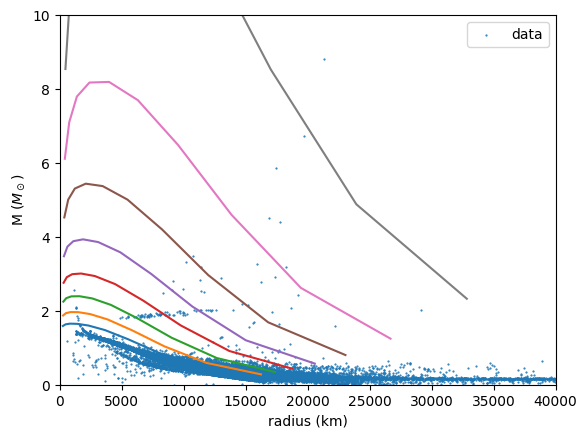

In [239]:
plt.scatter(df['radius'], df['mass'], label='data', s=0.3)
plt.ylim(0, 10)
plt.xlim(0, 40000)
plt.xlabel("radius (km)")
plt.ylabel(r"M ($M_\odot$)")
for i in range(len(k_list)):
    plt.plot(MR_r[i], MR_m[i])
plt.legend()

In [222]:
MR_L[0][-1]

2.8294015723415e+20

In [ ]:
#T.integrate(Tc=50000)[1][-1]
get_Teff(MR_L[-1][-1], MR_r[-1][-1])

3.3433802508990246e+17

In [260]:
wd.Z

AttributeError: 'WhiteDwarf' object has no attribute 'Z'

In [259]:
wd.rho_profile[0] * wd.rho0 *100 ** 3 / 100 * (6.626e-34 / np.sqrt(2 * np.pi * 12 * mp / 1000 * (1/6.02e23) * 100)) ** 3

5.940505077191419e-21

In [ ]:
def get_Teff(L, R):
    #L: erg/s
    #R: km
    return (L / (4 * np.pi * (R * 1000 * 100) ** 2 * 5.67e-5)) ** 0.25

from temperature import temperature
T = temperature(wd=wd)
T_eff = get_Teff(MR_L[-1][-1], MR_r[-1][-1])
print(T_eff)                 
T_profile = T.get_Tc(T_eff=T_eff, T_l=1e6, T_r=1e8, epsilon=5000)
plt.plot(T_profile)

309.28210924227665
Iteration: 1, dT: 504999690.71789074, Tc: 505000000.0
Iteration: 2, dT: 257499690.71789077, Tc: 257500000.0
Iteration: 3, dT: 133749690.71789075, Tc: 133750000.0
Iteration: 4, dT: 71874690.71789075, Tc: 71875000.0
Iteration: 5, dT: 40937190.717890754, Tc: 40937500.0
Iteration: 6, dT: 25468440.717890758, Tc: 25468750.0
Iteration: 7, dT: 17734065.717890758, Tc: 17734375.0


KeyboardInterrupt: 

(0.0, 40000.0)

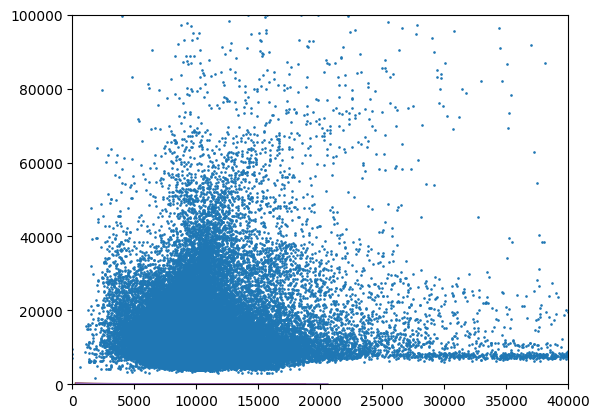

In [235]:
test = df[df['mass'] > 1.5]
#plt.scatter(test['radius'], test['teff'], s=0.8)
plt.scatter(df['radius'], df['teff'], s=0.8)
for i in range(len(k_list[:-5])):
    plt.plot(MR_r[i], get_Teff(MR_L[i], MR_r[i]))
plt.ylim(0, 1e5)   
plt.xlim(0, 40000)